In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-dataset/Crop_recommendation.csv
/kaggle/input/tableau-dashboard/Dashboard 1.png
/kaggle/input/tableau-dashboard/Dashboard 2.png


# **Project Name:- "Crop Production optimization Engine"#
# **By:- Balkrishan Mahabir** #

## **Description**##
In this project, an optimistic attempt has been made to support farmers; with the purpose to improve their farming productivity. Additionally, for doing so, a forecasting model has been developed by the use of machine learning; which can direct us, which crop will be best suitable for a specific climatic condition.

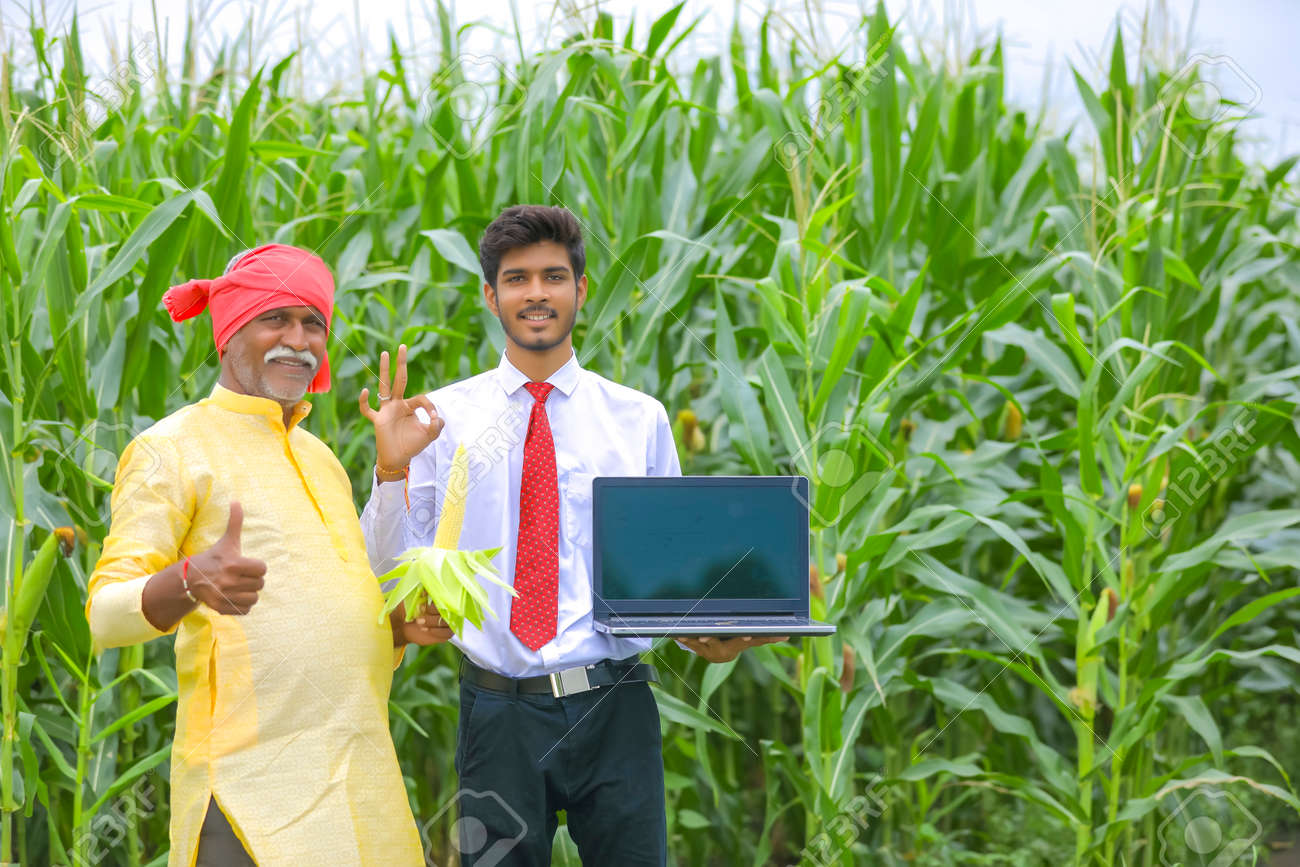

# **Terms meaning** #
* N = Nitrogen
* P = phosphorous
* K = Potassium
* Ph = A scale used to identify acidity or basicity nature; (Acid Nature- Ph<7; Neutral- Ph=7; Base Nature-P>7)
* label = Types of Crop (Rice,Maize, Chickpea; Kidney beans; pigeonpeas; mothbeans; mungbean;blackgram; lentil; pomegranate; banana; mango; grapes; watermelon;                                muskmelon; apple; orange;papaya; coconut; cotton; jute; coffee)

# Import library #

In [2]:
import numpy as np # for complx mathematical operation
import pandas as pd  # for data frame manipulation
import matplotlib.pyplot as plt # for creating data visulization
import seaborn as sns #for creating data visulization
from ipywidgets import interact # for interactive analysis & also helps in interacting with python
   # for implementing complex machine learning algorithm

# loading dataset

In [3]:
data= pd.read_csv('../input/crop-dataset/Crop_recommendation.csv')

# To find number of rows and column of the data

In [4]:
data.shape


(2200, 8)

**Here data containd 2200 "rows" & 8 "columns"**

# **Checking the first 5 row of the data set**

In [5]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# **Column name and their data type**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# **Statistical detail of data**

In [7]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


**Count is indicating exact number of the column; mean is indicating the average quantification of each column; on the other side standard deviation(std) illustrates variation from the average, "a low std-most values are close to mean","a high std-most values are at a huge distance from mean"**

# **Checking the null or any missing value in every column of data**

In [8]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

**No missing value is found in the data, indicates a high possibility of insight accuracy**

# **Plot of Rainfall requirement Vs Crops**

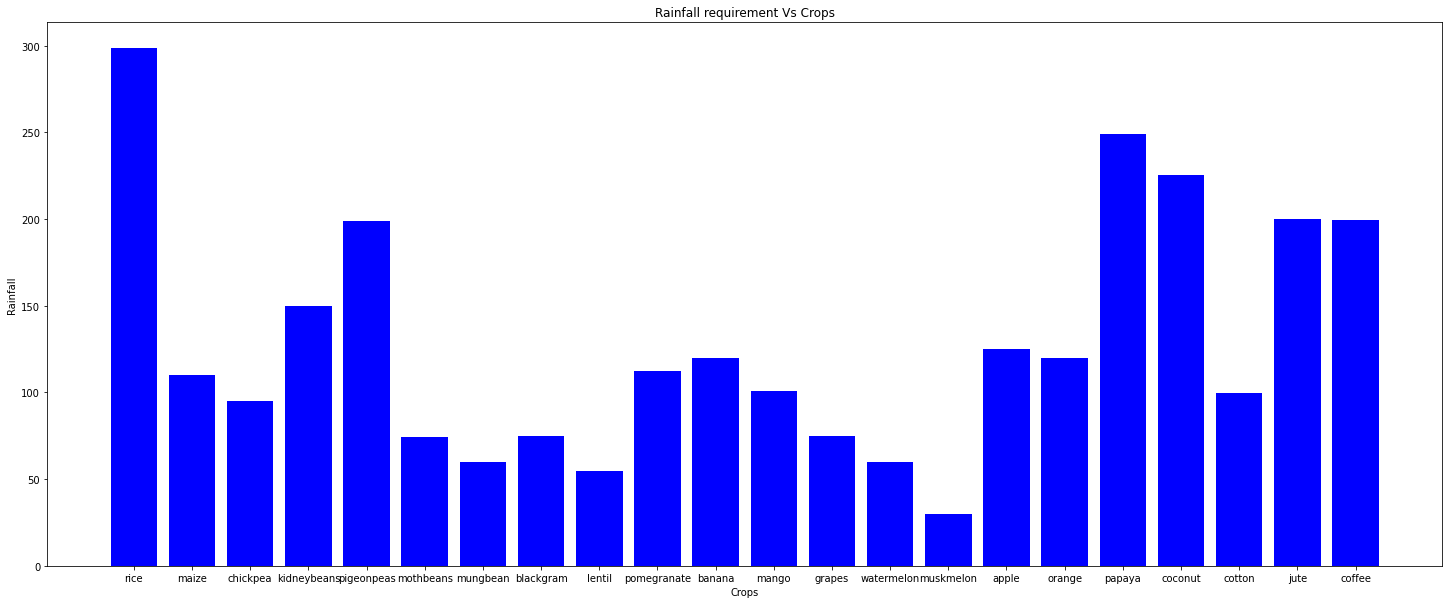

In [9]:
plt.figure(figsize=(25,10))
plt.bar(data['label'],(data['rainfall']),color=['Blue'])
plt.xlabel('Crops')
plt.title('Rainfall requirement Vs Crops')
plt.ylabel('Rainfall')
plt.show()

# **Plot of Humidity requirement Vs Crops**

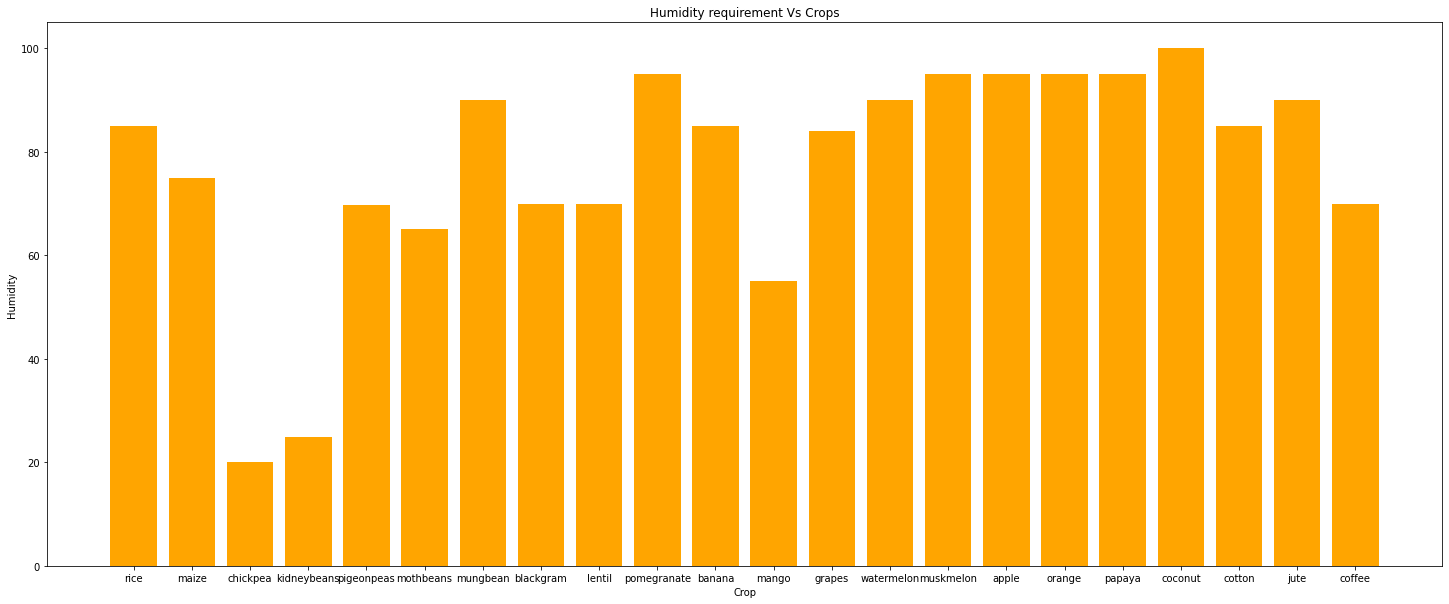

In [10]:
plt.figure(figsize=(25,10))
plt.bar(data['label'],(data['humidity']), color=['Orange'])
plt.xlabel('Crop')
plt.ylabel('Humidity')
plt.title("Humidity requirement Vs Crops")
plt.show()

# **Plot of Temperature requirement Vs Crops**

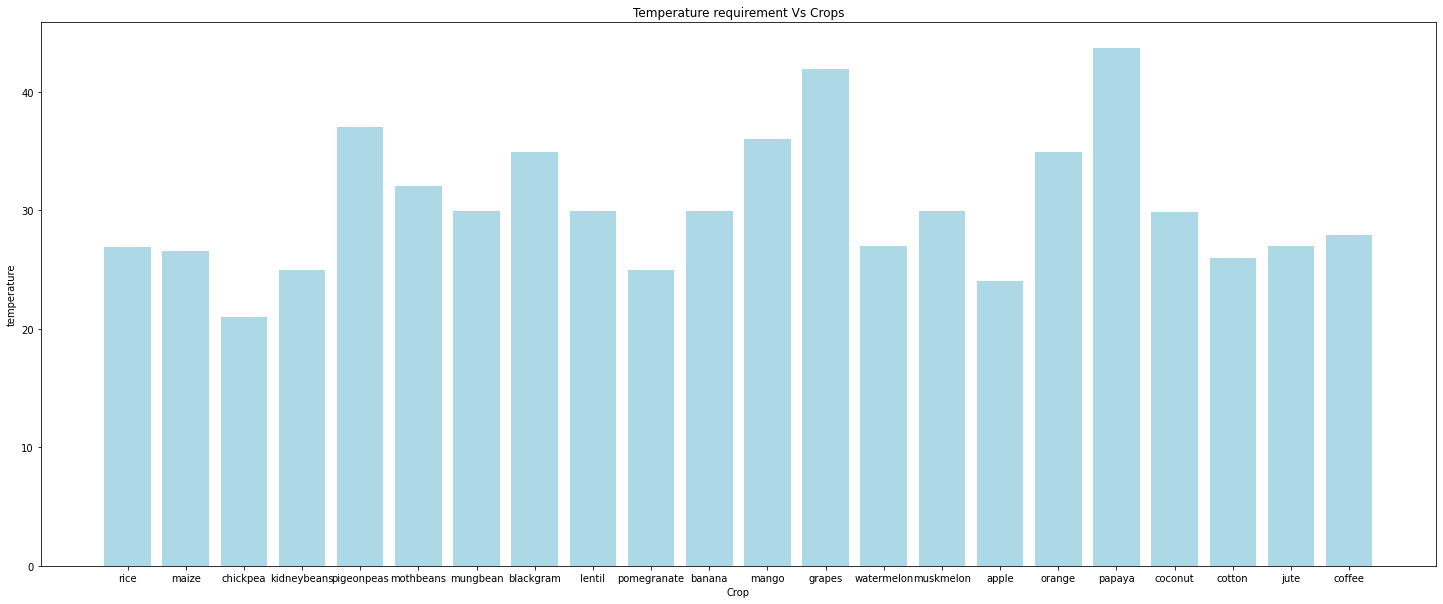

In [11]:
plt.figure(figsize=(25,10))
plt.bar(data['label'],(data['temperature']), color=['Lightblue'])
plt.xlabel('Crop')
plt.ylabel('temperature')
plt.title("Temperature requirement Vs Crops")
plt.show()

# **Plot of Ph_Value requirement Vs Crops**

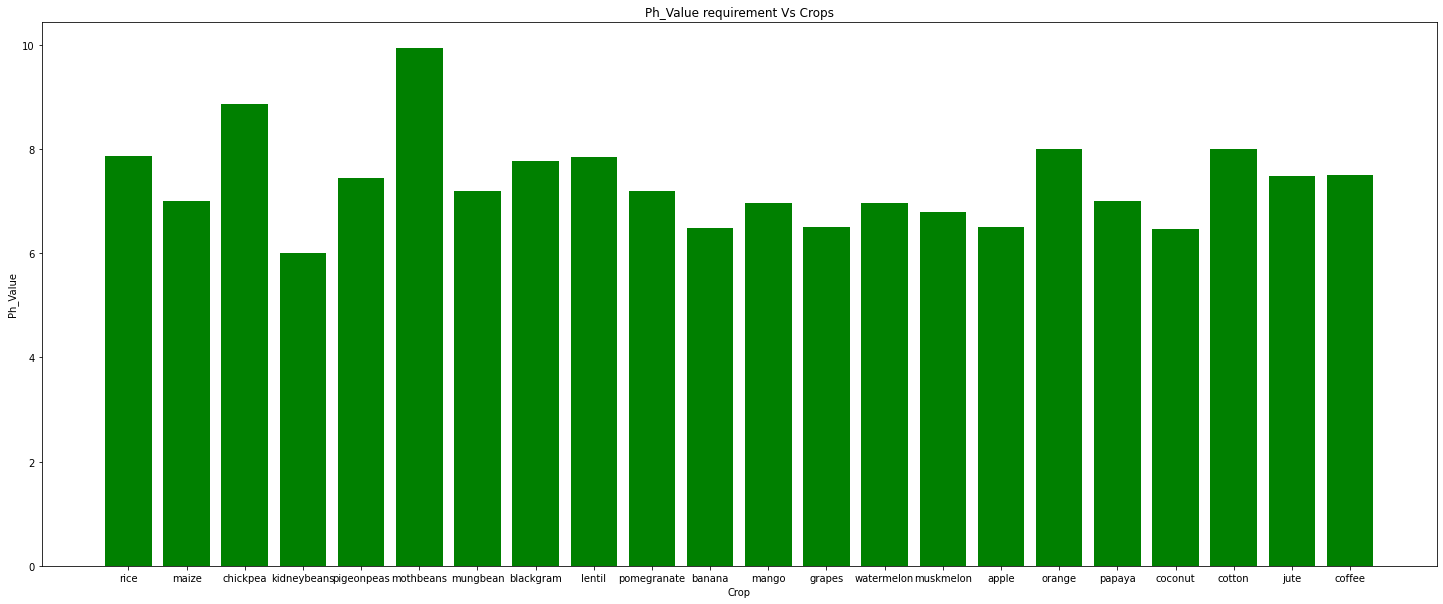

In [12]:
plt.figure(figsize=(25,10))
plt.bar(data['label'],(data['ph']), color=['Green'])
plt.xlabel('Crop')
plt.ylabel('Ph_Value')
plt.title("Ph_Value requirement Vs Crops")
plt.show()

# **Visualization By Tableau**

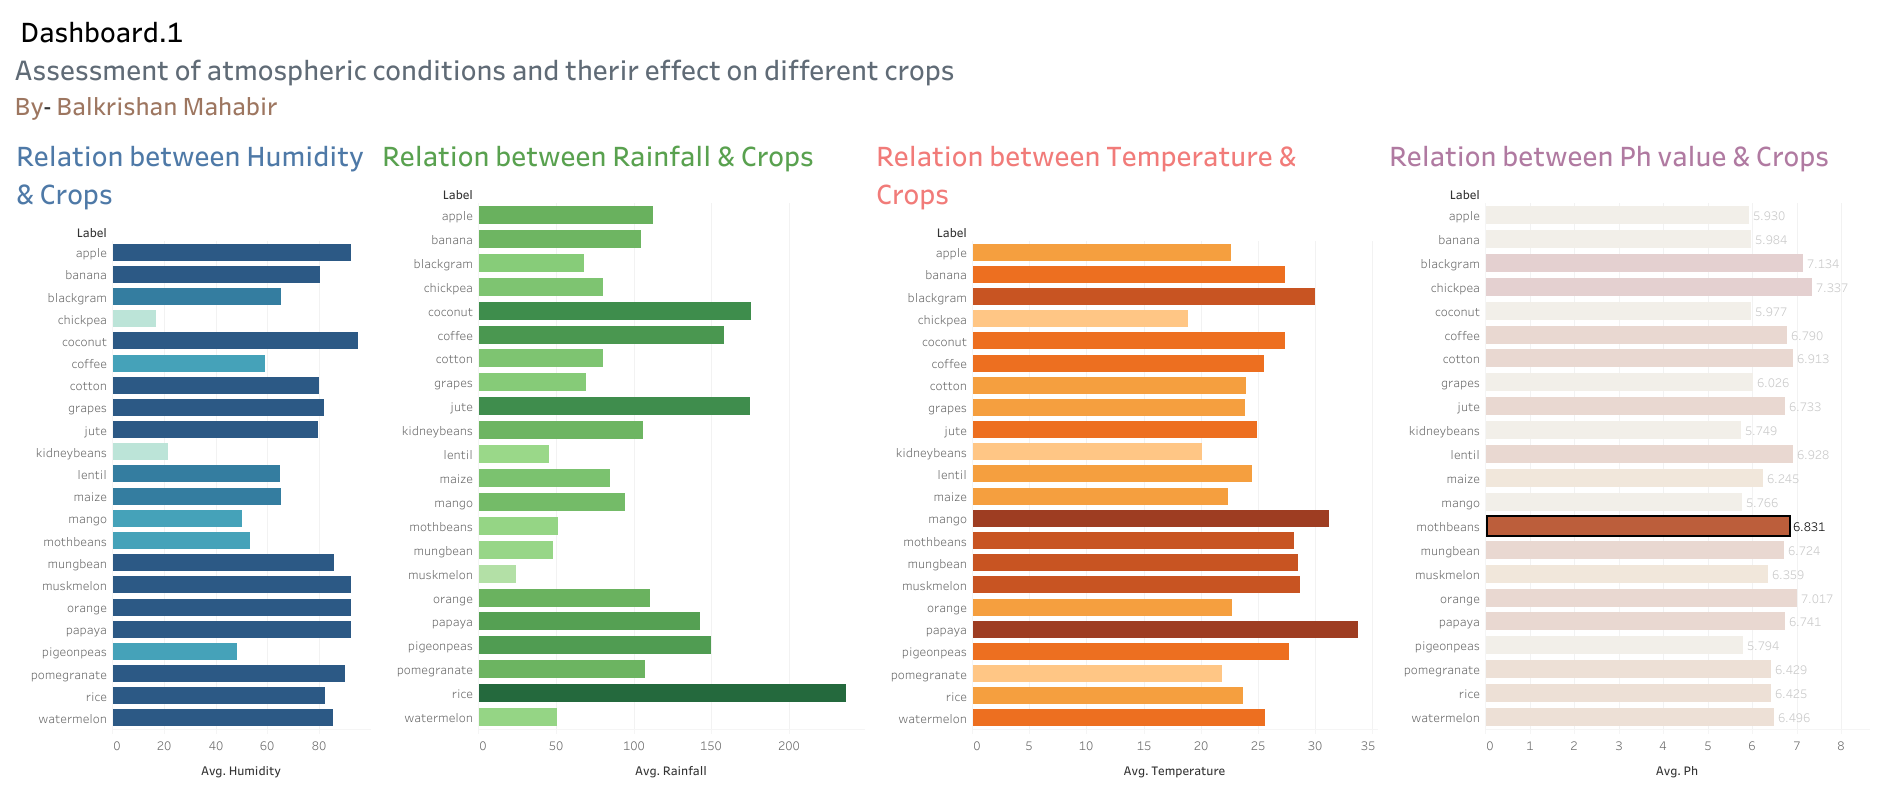

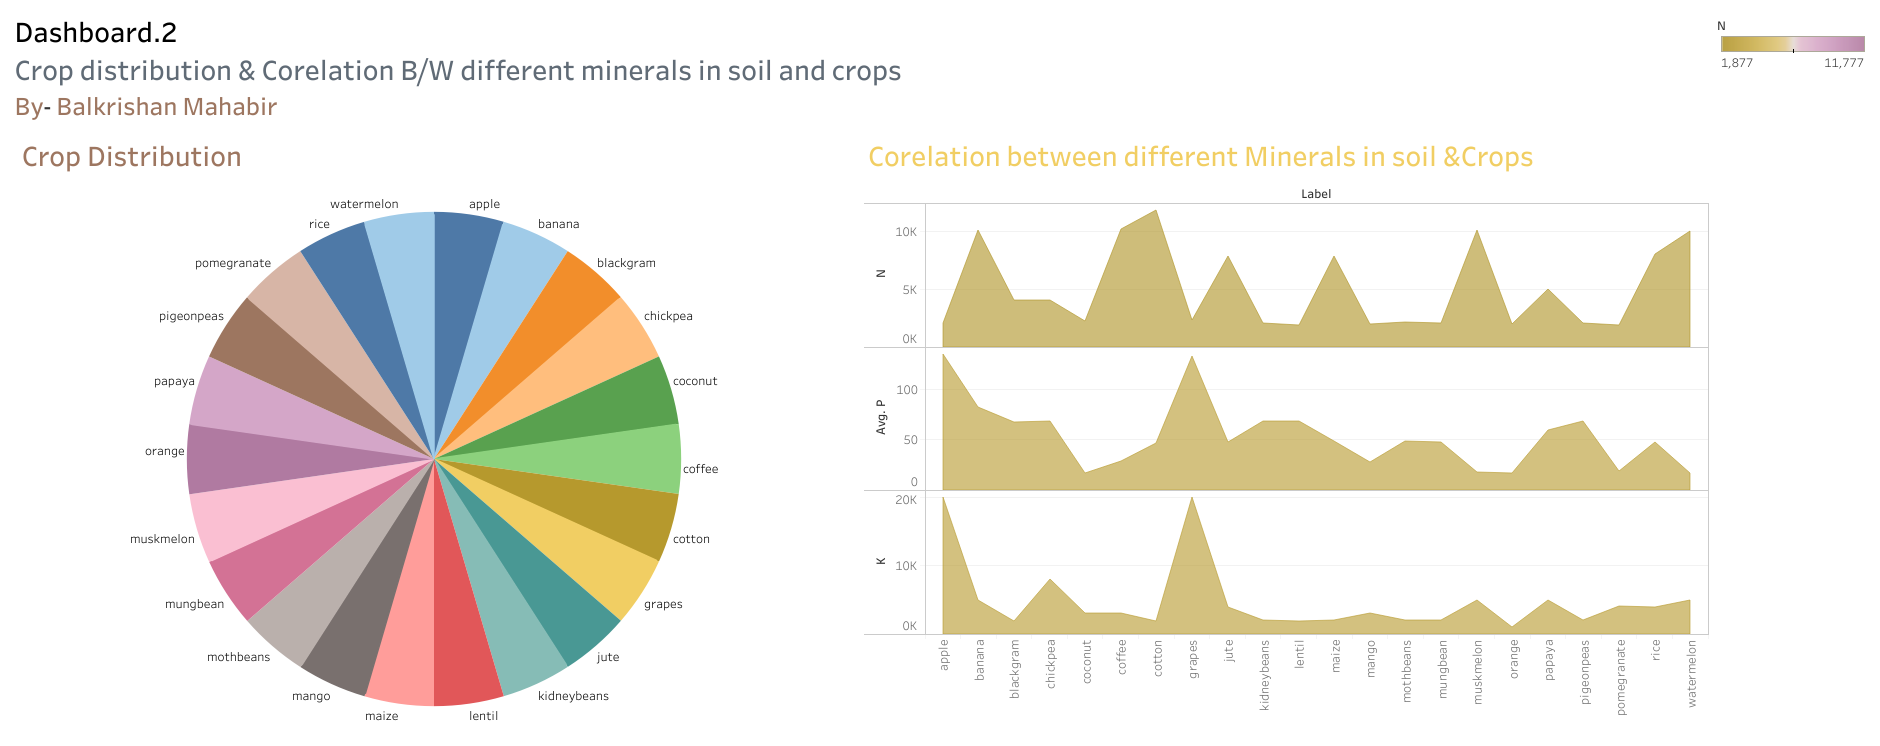

In [13]:
data['label'].value_counts()

coffee         100
kidneybeans    100
chickpea       100
watermelon     100
blackgram      100
mango          100
maize          100
jute           100
papaya         100
mothbeans      100
orange         100
coconut        100
muskmelon      100
mungbean       100
lentil         100
banana         100
apple          100
pigeonpeas     100
rice           100
cotton         100
pomegranate    100
grapes         100
Name: label, dtype: int64

** Column name "label" contains different types of crop; including fruits and crops**

# **Suitable average cimatic conditions needed by soil for crop production**

In [14]:
print("Average ratio of Nitrogen in soil : {0:.2f}".format(data['N'].mean()))
print("Average ratio of Phosphorous in soil:{0:.2f}".format(data['P'].mean()))
print("Average ratio of Potassium in soil:{0:.2f}".format(data["K"].mean()))
print("Average requirement of Temperature in soil:{0:.2f}".format(data["temperature"].mean()))
print("Average requirment of humidity in soil:{0:.2f}".format(data["humidity"].mean()))
print("Average requirement of ph scale in soil:{0:.2f}".format(data["ph"].mean()))
print("Average requiremen of rainfall in soil:{0:.2f}".format(data['rainfall'].mean()))


Average ratio of Nitrogen in soil : 50.55
Average ratio of Phosphorous in soil:53.36
Average ratio of Potassium in soil:48.15
Average requirement of Temperature in soil:25.62
Average requirment of humidity in soil:71.48
Average requirement of ph scale in soil:6.47
Average requiremen of rainfall in soil:103.46


**Average climatic conditions found as given below**
* ** Average ratio of Nitrogen in soil : 50.55
* **Average ratio of Phosphorous in soil:53.36
* ** Average ratio of Potassium in soil:48.15
* **Average requirement of Temperature in soil:25.62
* **Average requirment of humidity in soil:71.48
* **Average requirement of ph scale in soil:6.47
* **Average requiremen of rainfall in soil:103.46

# **Use of Interactive function from ipywidget library; to find the best optimum climatic condition for any specific crop**

In [15]:
@interact
def summary(crops= list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("-------------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen required:", x['N'].min())
    print("Average Nitrogen required:", x['N'].mean())
    print("Maximum Nitrogen required:", x['N'].max())
    print("-------------------------------------------------")      
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required:", x['P'].min())
    print("Average Phosphorous required:", x['P'].mean())
    print("Maximum Phosphorousrequired:", x['P'].max()) 
    print("-------------------------------------------------")     
    print("Statistics for Potassium")
    print("Minimum Potassium required:", x['K'].min())
    print("Average Potassium required:", x['K'].mean())
    print("Maximum Potassium required:", x['K'].max())
    print("-------------------------------------------------")      
    print("Statistics for Temperature")
    print("Minimum Temperature required:{0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required:{0:.2f}".format(x['temperature'].mean()))
    print("Maxmimum Temperature required:{0:.2f}".format(x['temperature'].max()))      
    print("-------------------------------------------------")       
    print("Statistics for Humidity")
    print("Minimum Humidity required:{0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required:{0:.2f}".format(x['humidity'].mean()))
    print("Maxmimum Humidity required:{0:.2f}".format(x['humidity'].max())) 
    print("-------------------------------------------------")
    print("Statistics for PH")      
    print("Minimum PH required:{0:.2f}".format(x['ph'].min()))
    print("Average PH required:{0:.2f}".format(x['ph'].mean()))
    print("Maxmimum PHy required:{0:.2f}".format(x['ph'].max())) 
    print("-------------------------------------------------")
    print("Statistics for rainfall")      
    print("Minimum rainfall required:{0:.2f}".format(x['rainfall'].min()))
    print("Average rainfall required:{0:.2f}".format(x['rainfall'].mean()))
    print("Maxmimum rainfallrequired:{0:.2f}".format(x['rainfall'].max())) 
                

interactive(children=(Dropdown(description='crops', options=('coffee', 'kidneybeans', 'chickpea', 'watermelon'…

# **Now comparing the requirement of Soil minerals and weather conditions of different crops**

In [16]:
@interact
def compare (conditions =['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for", conditions,"is{0:.2f}".format(data[conditions].mean()))
    print("---------------------------------------------")
    print("Rice: {0:.2f}".format(data[(data['label'] =='rice')][conditions].mean()))
    print("Black Grams: {0:.2f}".format(data[(data['label'] =='blackgram')][conditions].mean()))
    print("Banana: {0:.2f}".format(data[(data['label'] =='banana')][conditions].mean()))
    print("Jute: {0:.2f}".format(data[(data['label'] =='jute')][conditions].mean()))
    print("Coconut: {0:.2f}".format(data[(data['label'] =='coconut')][conditions].mean()))
    print("Apple: {0:.2f}".format(data[(data['label']=='apple')][conditions].mean()))
    print("Papaya: {0:.2f}".format(data[(data['label'] =='papaya')][conditions].mean()))
    print("Muskmelon: {0:.2f}".format(data[(data['label'] =='muskmelon')][conditions].mean()))
    print("Grapes: {0:.2f}".format(data[(data['label'] =='grapes')][conditions].mean()))
    print("Watermelon: {0:.2f}".format(data[(data['label'] =='watermelon')][conditions].mean()))
    print("Kidney Beans: {0:.2f}".format(data[(data['label'] =='kidneybeans')][conditions].mean()))
    print("Mung Beans: {0:.2f}".format(data[(data['label'] =='mungbeans')][conditions].mean()))
    print("Orange: {0:.2f}".format(data[(data['label'] =='orange')][conditions].mean()))
    print("Chick Peas: {0:.2f}".format(data[(data['label'] =='chickpea')][conditions].mean()))
    print("Lentils: {0:.2f}".format(data[(data['label'] =='lentil')][conditions].mean()))
    print("Cotton: {0:.2f}".format(data[(data['label']=='cotton')][conditions].mean()))
    print("Maize: {0:.2f}".format(data[(data['label'] =='maize')][conditions].mean()))
    print("Moth Beans: {0:.2f}".format(data[(data['label'] =='mothbeans')][conditions].mean()))
    print("Pigen Peas: {0:.2f}".format(data[(data['label'] =='pigeonpeas')][conditions].mean()))
    print("Mango: {0:.2f}".format(data[(data['label'] =='mango')][conditions].mean()))
    print("Pomegranate: {0:.2f}".format(data[(data['label'] =='pomegranate')][conditions].mean()))
    print("Coffee: {0:.2f}".format(data[(data['label'] =='coffee')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

# **Identifying the crops; which requires unusual or special weather and soil minerals**

In [17]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which needs greater amount than average condition of", conditions,'\n')
    print(data[data[conditions]>data[conditions].mean()]['label'].unique())
    print("---------------------------------------------------")
    print("Crops which requires less amount than average condition of", conditions,'\n')
    print(data[data[conditions]<=data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

# **Distribution plot of different climatic and weather conditions explaining the varriation in them**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

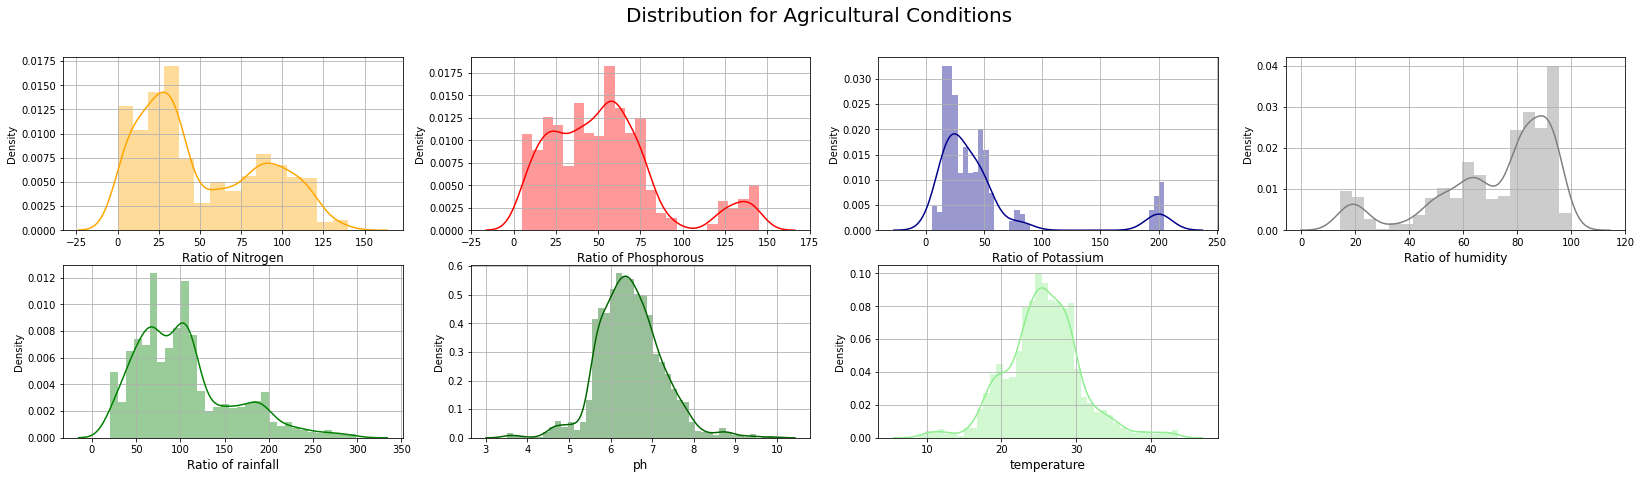

In [18]:
plt.figure(figsize=(28,7))
plt.subplot(2,4,1)
sns.distplot(data['N'], color='orange')
plt.xlabel('Ratio of Nitrogen', fontsize=12)
plt.grid()


plt.subplot(2,4,2)
sns.distplot(data['P'],color='red')
plt.xlabel('Ratio of Phosphorous', fontsize=12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['K'], color='darkblue')
plt.xlabel('Ratio of Potassium', fontsize=12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['humidity'], color='grey')
plt.xlabel('Ratio of humidity', fontsize=12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['rainfall'],color='green')
plt.xlabel('Ratio of rainfall', fontsize=12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['ph'], color='darkgreen')
plt.xlabel('ph', fontsize=12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(data['temperature'],color='lightgreen')
plt.xlabel('temperature', fontsize=12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize =20)
plt.show()



**The distributions are indicating that many crops are their which needed more, less and minimum climatic conditions**

# **Crops which requires extraordinary/special climatic conditions**

In [19]:
print(" Exceptional crops which needed unique conditions for their growth")
print("----------------------------------------------------------")
print('Crops which need extremly high ratio of Nitrogen condition in Soil:', data[data['N']>120]['label'].unique())
print("Crops which need extremly high ratio of Phosphorous condition in Soil:", data[data['P']>100]['label'].unique())
print("Crops which need extremly high ratio of Potassium condition in Soil:", data[data['K']>200]['label'].unique())
print("Crops which need extremly heavy rainfall:", data[data['rainfall']>200]['label'].unique())
print("Crops which need extremly high temperature:",data[data['temperature']>40]['label'].unique())
print("Crop which need extremly low humidity:",data[data['humidity']<20]['label'].unique())
print("Crops which need extremly low rainfall:", data[data['rainfall']<100]['label'].unique())
print("Crops which ned extremly low ph:",data[data['ph']<4]['label'].unique())
print("Crops which need extremly high ph:",data[data["ph"]>9]['label'].unique())


 Exceptional crops which needed unique conditions for their growth
----------------------------------------------------------
Crops which need extremly high ratio of Nitrogen condition in Soil: ['cotton']
Crops which need extremly high ratio of Phosphorous condition in Soil: ['grapes' 'apple']
Crops which need extremly high ratio of Potassium condition in Soil: ['grapes' 'apple']
Crops which need extremly heavy rainfall: ['rice' 'papaya' 'coconut']
Crops which need extremly high temperature: ['grapes' 'papaya']
Crop which need extremly low humidity: ['chickpea' 'kidneybeans']
Crops which need extremly low rainfall: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'banana' 'mango' 'grapes' 'watermelon' 'muskmelon'
 'papaya' 'cotton']
Crops which ned extremly low ph: ['mothbeans']
Crops which need extremly high ph: ['mothbeans']


 so, data contains "2200" rows & "8" columns 

# **Classiifying the crops as per their best productivity and sutability to the season**

In [20]:
print("Summer Season Crop")
print(data[(data['temperature']>30)&(data['humidity']>50)]['label'].unique())
print("********************************************************")
print("Winter Season crop")
print(data[(data['temperature']<20)&(data['humidity']>30)]['label'].unique())
print("*********************************************************")
print("Rainy season Crop")
print(data[(data['rainfall']>200) &(data['humidity']>30)]['label'].unique())
      
      
      
           

Summer Season Crop
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
********************************************************
Winter Season crop
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
*********************************************************
Rainy season Crop
['rice' 'papaya' 'coconut']


**Till now we have performed exploratory analysis of the given data**

# **Now, its time to find the crops which need similar climatic conditions and mineral requirements and club them together into a group by the help of "Clustering Analysis"**
**Clustering Analysis comes under unsupervised learning; means we train our model without labels**

In [21]:
from sklearn.cluster import KMeans # Importing KMeans Algorithm used for clustering Analysis
# removing the labels column
x=data.drop(['label'],axis=1) # Removing labels as it is a case of Unsupervised Learning

# selecting all the values of the data

x= x.values

# checking the shape
print(x.shape)

(2200, 7)


# **Using Elbow Algorithm to find the optimum number of Clusters required**

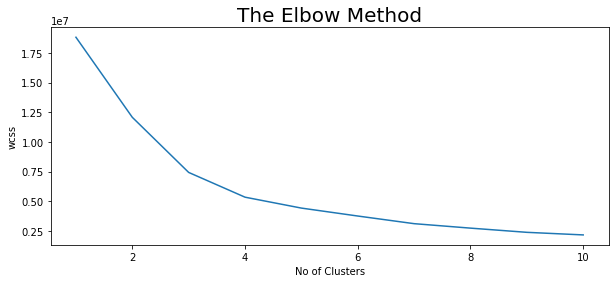

In [22]:

plt.rcParams['figure.figsize']=(10,4)


wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i, init ='k-means++', max_iter=300, n_init=10, random_state =0)
    km.fit(x)
    wcss.append(km.inertia_)
    
    
#Lets Plot the results
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

# **There are two elbows first @ 3 & Second @ 4;always select the last Elbow: Hence our Cluster should be 4**

In [23]:
# Lets implement the K means algorithm to perform Clustering analysis
km = KMeans(n_clusters=4, init='k-means++', max_iter = 300,n_init=10,random_state=0)
y_means =km.fit_predict(x)

# Lets find out the Results
a= data['label']
y_means=pd.DataFrame(y_means)
z=pd.concat([y_means,a],axis=1)
z=z.rename(columns={0:'cluster'})

# Lets check the Cluster of each Crops
print(" Lets check the Results After Applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster']==0]['label'].unique())
print("--------------------------------------------------------------")
print(" Crops in Second cluster:", z[z['cluster']==1]['label'].unique())
print('---------------------------------------------------------------')
print("Crops in Third cluster:", z[z['cluster'] ==2]['label'].unique())
print("----------------------------------------------------------------")
print("Crops in Forth Cluster:",z[z['cluster']==3]['label'].unique())

 Lets check the Results After Applying the K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
--------------------------------------------------------------
 Crops in Second cluster: ['grapes' 'apple']
---------------------------------------------------------------
Crops in Third cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
----------------------------------------------------------------
Crops in Forth Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']


**These helps Farmers to adopting similar kind of crops and yield maximum productivity**

# **We need to train our model without labels; because if our model trains woth label, it may cheat and our accuracy declines**
* So we drop labels from dataset

In [24]:
#Let spilit the Dataset for Predictive Modelling
y=data['label'] # Storing label in Y varriable
x=data.drop(['label'], axis=1)
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (2200, 7)
Shape of y: (2200,)


# **Now its time to divide the data into two sets; train_data & test_data**

In [25]:
#Lets create Training and Testing Sets for validation of Results
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=0) # 80% Data will be alotted into trainins set & remaining 20% will be sent into testing set
print("The Shape of x train:", x_train.shape)
print("The Shape of x test:",x_test.shape)
print("The Shape of y train:",y_train.shape)
print("The Shape of y test",y_test.shape)

The Shape of x train: (1760, 7)
The Shape of x test: (440, 7)
The Shape of y train: (1760,)
The Shape of y test (440,)


# **Its time to form a predective model; which guides us about the best prductive crop according to the climatic condition and minerals; for which we need to use an Machine learning algorithm to train our model**
* After our model get trained, we use the model for further predections
* We are using Logistic Regression algorithm to train our Model
* Logistic Regression is a probabilistic model;suitable for probabilistic or multiple classes types cases; we have 22 classes here in our cases

In [26]:
from sklearn.linear_model import LogisticRegression  # Importing LogisticRegression from SKlearn to make our predective model


model = LogisticRegression(solver = 'liblinear') # Storing our Algorithm in varriable name model 
model.fit(x_train, y_train) # Our model hase been trained from the data stored into training data set, Our model is fully trained now , further function used to predection
y_pred = model.predict(x_test) #  we predict our model for x_test data set and further stored it into y_pred variable




# **We know the answer of the x_test data set have been stored into y_test, so to check the accuracy of the model, wew need to compare y_pred with y_test data, and to compare y_test with y_pred we use classification report**

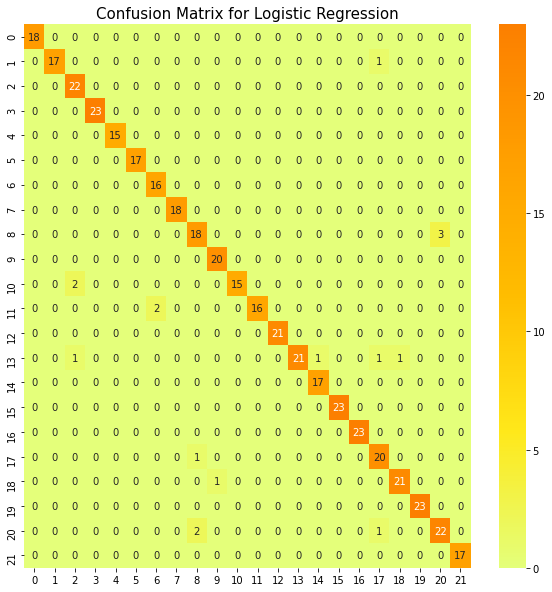

In [27]:
from sklearn.metrics import confusion_matrix 
plt.rcParams['figure.figsize']=(10,10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot =True, cmap ='Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
plt.show()

# **Code for classification Report**

In [28]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred)
print(cr)

    

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      0.94      0.97        18
   blackgram       0.88      1.00      0.94        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.86      0.86        21
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      0.88      0.94        17
       maize       1.00      0.89      0.94        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.84      0.91        25
    mungbean       0.94      1.00      0.97        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       0.87    

**By the help of classification report; we get the value of Precision & recall, further if both precicion and recall are very optimum it indicate strong accuracy of our training model**

# **96% accuracy of our predicting model has been achived**

In [29]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# **Lets check the accuracy of our model**

In [30]:
prediction = model.predict((np.array([[90,# 90 for Nitrogen
                                      40, # 40 for Phosphorous
                                      40, # 40 for Pota
                                      20, # 20 for temperature
                                      80, # 80 for humidity
                                      7 , # 7 for ph
                                      200]])))  # 200 for rainfal
print("The suggested crop for given climatic condition is:", prediction)  
                           #Now time to check the output is rice or not

The suggested crop for given climatic condition is: ['rice']


# **Wow! our model is suggesting accurate crop its mean our model is very much accurate**

#